<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionales1/blob/main/Semana15/AjusteHistogramas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive
import scipy.optimize as spo

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
os.chdir("/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI")
!ls

Parcial2    Semana10  Semana13	Semana2  Semana5  Semana8
ProyectoML  Semana11  Semana14	Semana3  Semana6  Semana9
Semana1     Semana12  Semana15	Semana4  Semana7


In [14]:
file = '/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/Semana15/Data/Gaussiano.csv'
data = pd.read_csv(file)
x = data['x']

In [15]:
x

,x
0,0.906451
1,5.446117
2,6.840238
3,0.743644
4,7.338518
...,...
95,1.497647
96,4.236658
97,4.678540
98,6.479197


(array([ 3.,  9.,  6., 13., 25., 19., 14.,  8.,  2.,  1.]),
 array([-0.3806526 ,  0.56123737,  1.50312733,  2.4450173 ,  3.38690727,
         4.32879724,  5.2706872 ,  6.21257717,  7.15446714,  8.0963571 ,
         9.03824707]),
 <BarContainer object of 10 artists>)

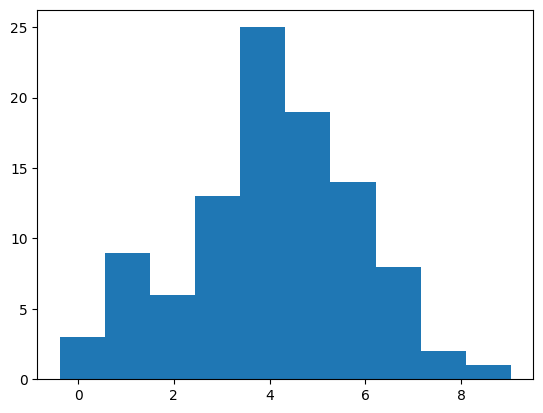

In [16]:
plt.hist(x)

In [17]:
def Likelihood(p,x):
  mean,std = p
  return 1/np.sqrt(2*np.pi*std**2)*np.exp(-(x-mean)**2/(2*std**2))

(array([0.03185085, 0.09555256, 0.06370171, 0.13802037, 0.26542378,
        0.20172208, 0.14863732, 0.08493561, 0.0212339 , 0.01061695]),
 array([-0.3806526 ,  0.56123737,  1.50312733,  2.4450173 ,  3.38690727,
         4.32879724,  5.2706872 ,  6.21257717,  7.15446714,  8.0963571 ,
         9.03824707]),
 <BarContainer object of 10 artists>)

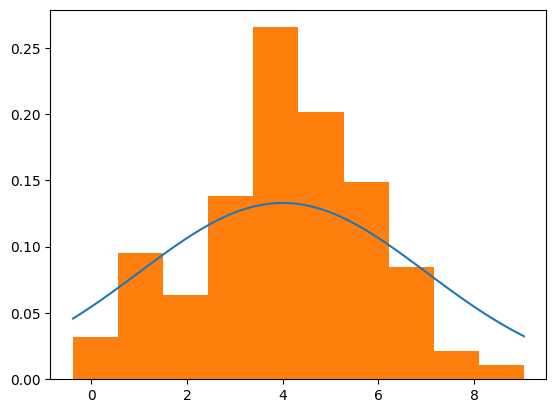

In [24]:
_x = np.linspace(np.min(x),np.max(x),50)
Like = Likelihood([4,3],_x)
plt.plot(_x,Like)
plt.hist(x,density=True)

In [25]:
x.shape

(100,)

In [26]:
def JointLikelihood(p,x):
  return -np.sum(np.log(Likelihood(p,x)))

In [28]:
JointLikelihood([4,5],x)

np.float64(259.3581947230094)

In [31]:
sigma_ = np.linspace(0.1,5,10)
Like = np.zeros_like(sigma_)
for i in range(len(sigma_)):
  Like[i] = JointLikelihood([6,sigma_[i]],x)

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


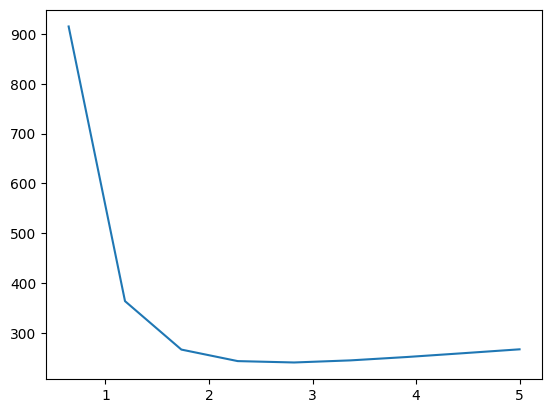

In [32]:
plt.plot(sigma_,Like)

In [33]:
import scipy.optimize as spo
p0 = np.array([3.,0.5])
result = spo.minimize(JointLikelihood,p0,args=(x,))
result.x


array([4.01514078, 1.80555969])

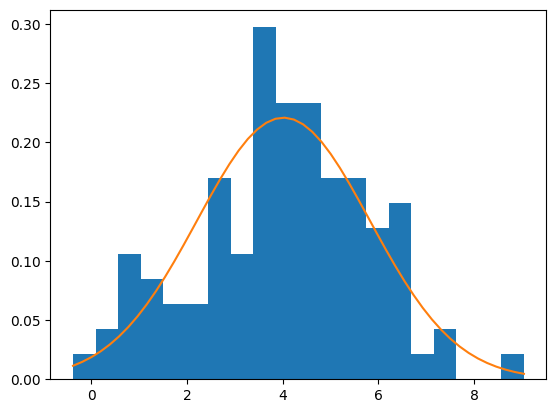

In [36]:
_x = np.linspace(np.min(x),np.max(x),50)
Like = Likelihood(result.x,_x)
plt.hist(x,density=True,bins=20)
plt.plot(_x,Like)